In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Skipping the 1st row, starting to read data from columns headers:
loan_stats_data = pd.read_csv(r'C:\Users\hila\ml_final_ex\LoanStats3a.csv',low_memory=False,skiprows=1)

In [3]:
# Deleting columns that contain only NaNs:
loan_stats_data=loan_stats_data.dropna(axis=1,how='all',thresh=30000)

# Create a boolean column for loan_status:
d = {'Charged Off':0, 'Fully Paid':1}
loan_stats_data['loan_status_bool'] = pd.Series(loan_stats_data['loan_status'].map(d))

# remove rows with NaN in loan_status_bool column:
loan_stats_data=loan_stats_data.dropna(axis=0, how='any', subset=['loan_status_bool'])

# Removing all columns that have only one unique value:
loan_stats_data=loan_stats_data[[c for c in list(loan_stats_data) if loan_stats_data[c].nunique(dropna=True)>1]]

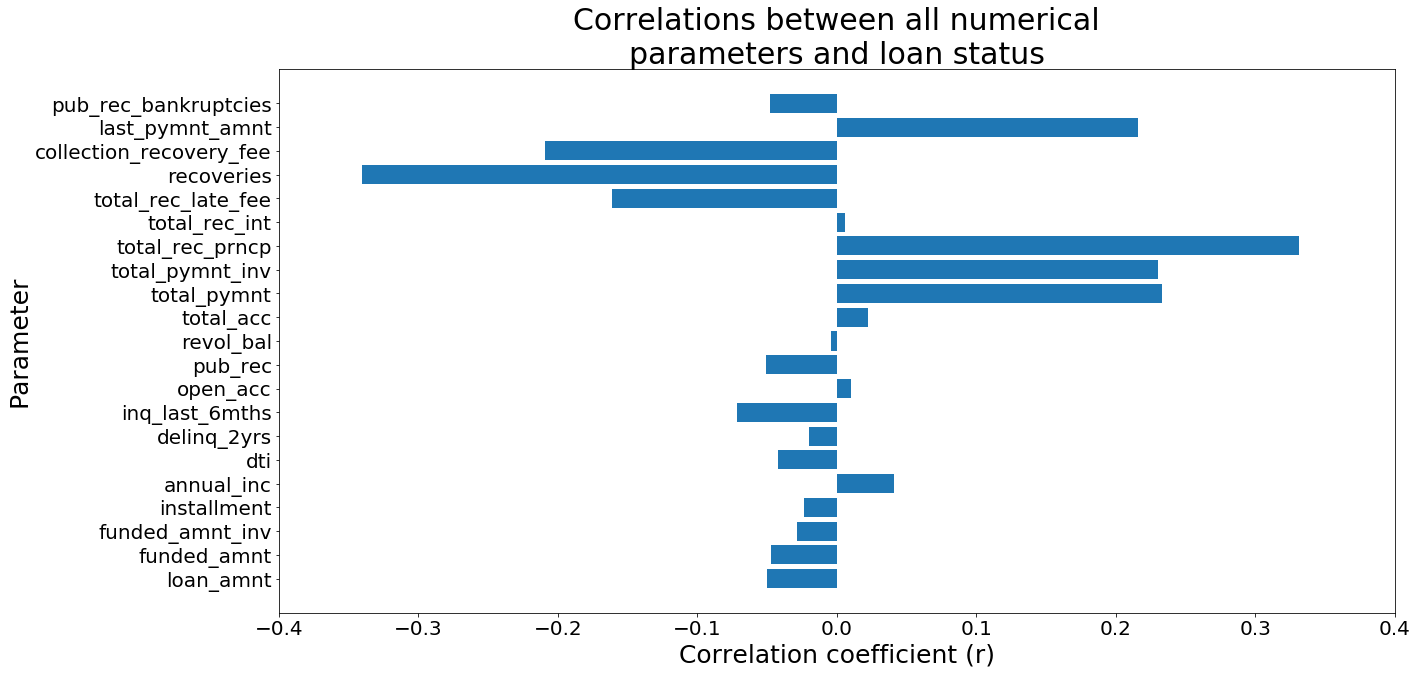

In [16]:
# Find numeric variables:
numeric_data = loan_stats_data._get_numeric_data()

# Find correlations between each column to the loan_status_bool:
r = numeric_data.corr(method="pearson")

plt.figure(figsize=(20,10))
plt.barh(r.columns[:-1],r.loan_status_bool[:-1])
plt.xlim(-0.4, 0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Parameter',fontsize=25)
plt.xlabel('Correlation coefficient (r)', fontsize=25)
plt.title('Correlations between all numerical\nparameters and loan status',fontsize=30)
plt.show()

In [18]:
# Choose only numeric parametirs with an absolute correlation greater than 0.1:
r = r.loan_status_bool[:-1]
corr_params = r.values
is_corr = np.where(np.abs(corr_params)>0.1)

# Leave only correlated parameters and display descriptive statistics:

numeric_data[r.index[is_corr]].describe()

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000
mean,12232.068419,11645.372879,9855.428956,1.388777,98.910397,13.022573,2679.087785
std,9167.934939,9071.198517,7143.373160,7.398941,713.320358,152.504078,4443.389974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5584.640282,5124.270000,4620.910000,0.000000,0.000000,0.000000,218.025000
50%,9937.094781,9311.680000,8000.000000,0.000000,0.000000,0.000000,549.425000
75%,16627.629345,15907.607500,14000.000000,0.000000,0.000000,0.000000,3292.122500
max,58886.473429,58563.680000,35000.020000,180.200000,29623.350000,7002.190000,36115.200000


C:\Users\hila\Miniconda3\envs\MLcourse\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


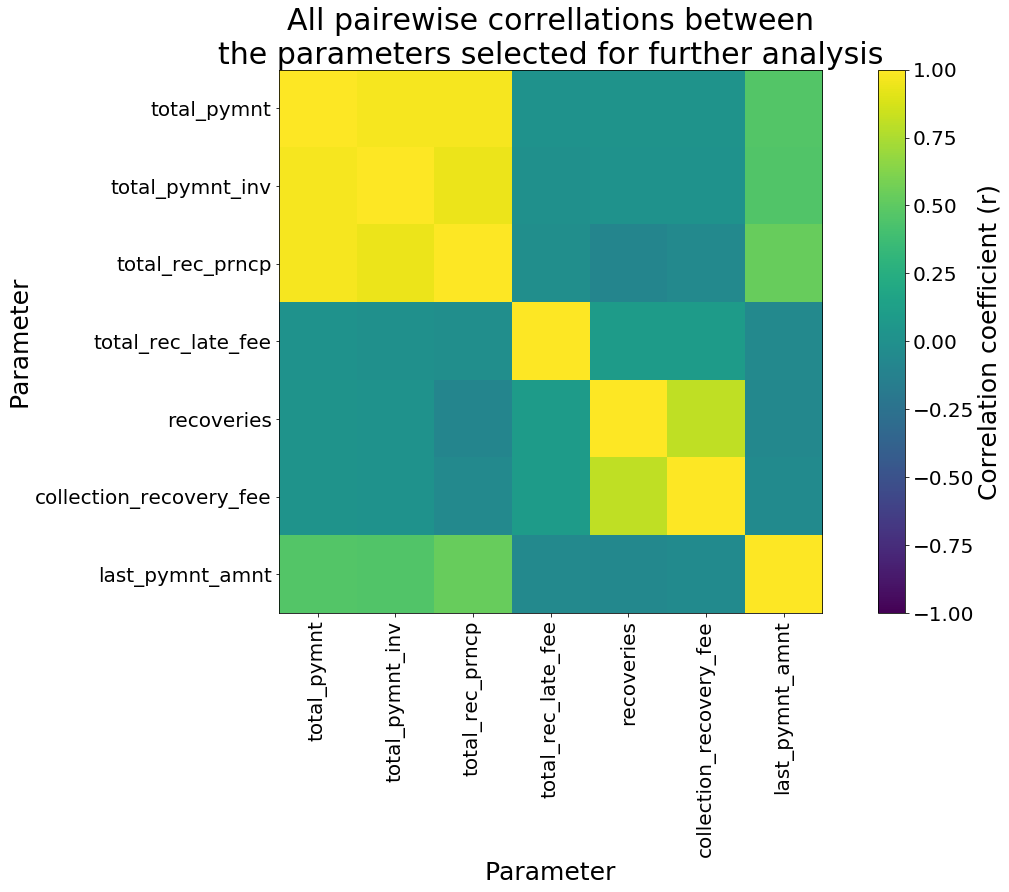

In [28]:
fig = plt.figure(figsize=(20,10))
plt.imshow(numeric_data[r.index[is_corr]].corr().as_matrix())
plt.clim(-1,1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Correlation coefficient (r)',fontsize=25)
plt.xticks(np.arange(0,len(is_corr[0])),list(r.index[is_corr[0]]), rotation='vertical',fontsize=20)
plt.yticks(np.arange(0,len(is_corr[0])),list(r.index[is_corr[0]]),fontsize=20)
plt.ylabel('Parameter',fontsize=25)
plt.xlabel('Parameter', fontsize=25)
plt.title('All pairewise correllations between\nthe parameters selected for further analysis',fontsize=30)

plt.show()